In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Loading the dataset through the tensorflow Package
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing the data from the range of [0, 255] to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshaping the data to include the channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# One-hot encoding of the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
# Convolutional Neural Network Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compiling the CNN model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\AKASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Training
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.8454 - loss: 0.4843 - val_accuracy: 0.9841 - val_loss: 0.0485
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 32ms/step - accuracy: 0.9737 - loss: 0.0865 - val_accuracy: 0.9888 - val_loss: 0.0349
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9815 - loss: 0.0624 - val_accuracy: 0.9895 - val_loss: 0.0303
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9864 - loss: 0.0458 - val_accuracy: 0.9912 - val_loss: 0.0280
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9882 - loss: 0.0398 - val_accuracy: 0.9917 - val_loss: 0.0247
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9896 - loss: 0.0345 - val_accuracy: 0.9918 - val_loss: 0.0248
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9912 - loss: 0.0286 - val_accuracy: 0.9925 - val_loss: 0.0244
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.9927 - loss: 0.0243 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9902 - loss: 0.0459
Test accuracy: 0.9922000169754028
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


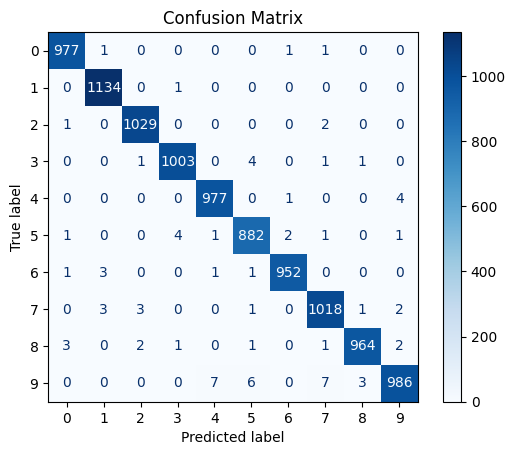

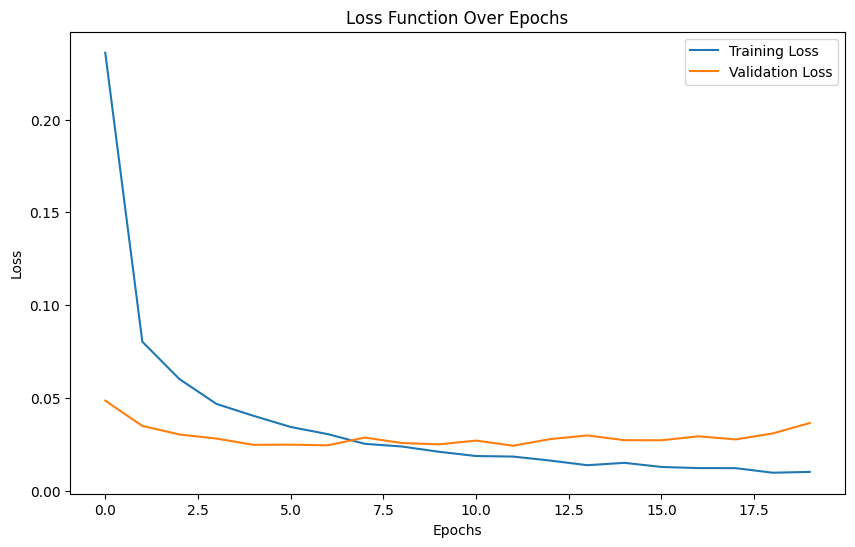

In [5]:
# Accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Loss function Over Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.legend()
plt.show()

In [6]:
model.save('model/mnist_cnn_model.h5')